In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

In [50]:
# Get data-set: sinus with a little noise
def get_noisy_sin(n):
    # noise~N(0,1)
    noise = np.random.normal(0,1,n)
    X = np.random.uniform(-100, 100, n)
    y = np.sin(X) + noise
    return X, y

In [51]:
X, y = get_noisy_sin(500)
X_train, X_test, y_train, y_test = sk.train_test_split(X, y, test_size=0.33)

In [ ]:
# Polynomial regression

In [240]:
def get_polynomials(X_train, polynomial=[1]):
    # Create a data-frame for easier handling:
    df = pd.DataFrame(X_train)
    df_output = pd.DataFrame()
    for elem in polynomial:
        for col in df.columns:
            index = "{}_{}".format(col, (elem))
            df_output[index] = df[col]**(elem)
    
    return df_output.values
    

In [233]:
def get_coefficients(X_train, y_train, delta=1.0, polynomial=[1]):  
    # get polynomials
    X_transformed = get_polynomials(X_train, polynomial)    
    
    #add 1s
    X_transformed = np.hstack((np.ones((X_transformed.shape[0],1)), X_transformed)) 
    
    print(X_transformed.shape)
    XtX = np.dot(X_transformed.T, X_transformed)
    deltaI = delta**2 * np.identity(X_transformed.shape[1])
    xy = np.dot(X_transformed.T, y_train)
    beta = np.dot(np.linalg.inv(XtX + deltaI), xy)
    
    return beta


In [234]:
def predict(X_test, X_train, y_train, delta, polynomial=[1]):
    beta = get_coefficients(X_train, y_train, delta, polynomial)
    # get polynomials for X_test
    X_test = get_polynomials(X_test, polynomial)
    # pad also X_test
    X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test)) 
    y_predict = np.dot(X_test, beta)
    return y_predict


In [235]:
def squared_loss(y_true, y_predict):
    loss = (y_true - y_predict)**2
    return sum(loss)/y_true.size

In [ ]:
# kfold 

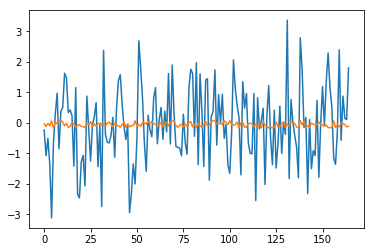

In [294]:
y_predict = predict(X_test, X_train, y_train, delta=1, polynomial=[1,2,3])

(335, 2)


In [295]:
squared_loss(y_test, y_predict)

1.5661453979993598

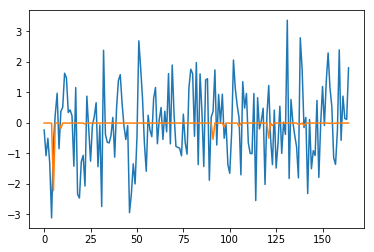

In [296]:
plt.plot(y_test)
plt.plot(y_predict)
plt.show()